In [1]:
import inverse_geometry
import inverse_geometry_test
import old_inverse_geometry
from function_profiler import FunctionProfiler
from tools import setupwithmeshcat

pybullet build time: Oct 14 2023 16:04:51


In [2]:
profiler = FunctionProfiler()

In [3]:
@profiler.profile("Solution A")
def computeqgrasppose_a(robot, qcurrent, cube, cubetarget, viz=None):
    return inverse_geometry.computeqgrasppose(robot, qcurrent, cube, cubetarget, viz)

@profiler.profile("Solution B")
def computeqgrasppose_b(robot, qcurrent, cube, cubetarget, viz=None):
    return old_inverse_geometry.computeqgrasppose(robot, qcurrent, cube, cubetarget, viz)

In [4]:
robot, cube, viz = setupwithmeshcat()
inverse_geometry_test.random_tests(robot, cube, viz, interactive=False, iters=10, computeqgrasppose=computeqgrasppose_a)
inverse_geometry_test.random_tests(robot, cube, viz, interactive=False, iters=10, computeqgrasppose=computeqgrasppose_b)

Wrapper tries to connect to server <tcp://127.0.0.1:6000>
You can open the visualizer by visiting the following URL:
http://127.0.0.1:7001/static/
Running 10 tests
Test 1/10: [0.43745401 0.36057145 1.04639879]
✅ Successfully solved

Test 2/10: [ 0.45986585 -0.27518509  0.9311989 ]
❌ Failed to solve

Test 3/10: [0.40580836 0.29294092 1.020223  ]
❌ Failed to solve

Test 4/10: [ 0.47080726 -0.3835324   1.09398197]
✅ Successfully solved

Test 5/10: [ 0.48324426 -0.23012871  0.93636499]
❌ Failed to solve

Test 6/10: [ 0.41834045 -0.15660621  1.00495129]
❌ Failed to solve

Test 7/10: [ 0.4431945  -0.16701669  1.02237058]
✅ Successfully solved

Test 8/10: [ 0.41394939 -0.16628428  0.97327237]
❌ Failed to solve

Test 9/10: [0.445607   0.22814077 0.93993476]
❌ Failed to solve

Test 10/10: [0.45142344 0.07393166 0.90929008]
❌ Failed to solve


📋 Test Results

💯 Success Rate: 3/10 (30.00%)
💥 Collision Rate: 7/10 (70.00%)
🦾 Joint Limits Violated Rate: 0/10 (0.00%)

Running 10 tests
Test 1/10: [0.4

/Users/heng/Documents/lab/function_profiler.py:51: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True, label=name)
/Users/heng/Documents/lab/function_profiler.py:51: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True, label=name)


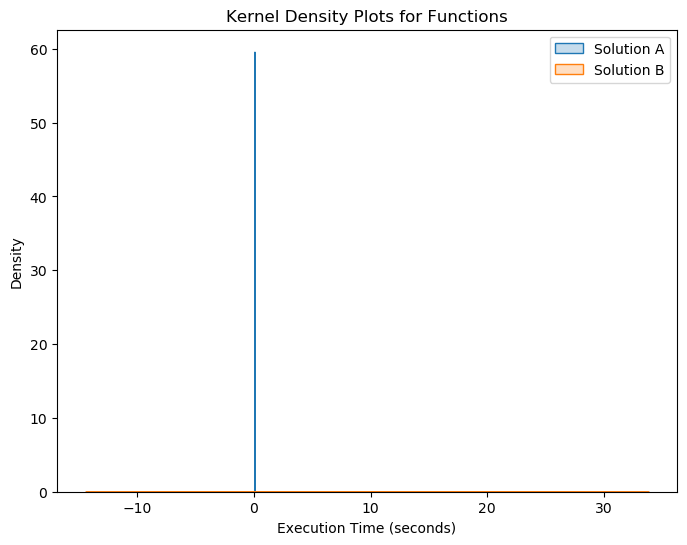

In [5]:
profiler.plot_all("Solution A", "Solution B")

/Users/heng/Documents/lab/function_profiler.py:39: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, color='b', shade=True)


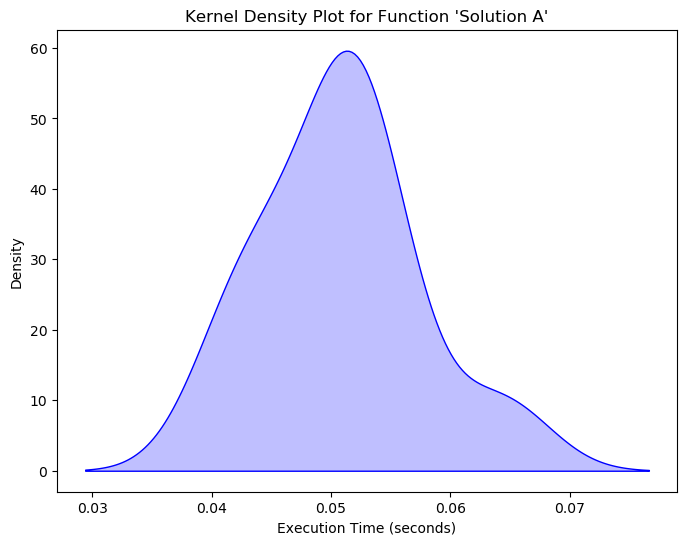

In [6]:
profiler.plot("Solution A")

/Users/heng/Documents/lab/function_profiler.py:39: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, color='b', shade=True)


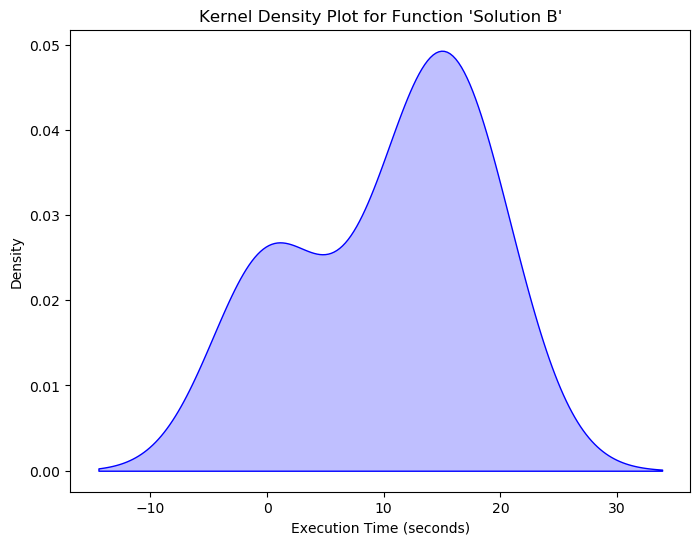

In [7]:
profiler.plot("Solution B")

In [ ]:
from path import computepath
from tools import setupwithmeshcat
from config import CUBE_PLACEMENT, CUBE_PLACEMENT_TARGET
from inverse_geometry import computeqgrasppose
import numpy as np

# Seed the random number generator
np.random.seed(42)

robot, cube, viz = setupwithmeshcat()

q = robot.q0.copy()
q0,successinit = computeqgrasppose(robot, q, cube, CUBE_PLACEMENT, viz)
qe,successend = computeqgrasppose(robot, q, cube, CUBE_PLACEMENT_TARGET,  viz)

if not(successinit and successend):
    print ("error: invalid initial or end configuration")

path = computepath(q0,qe,CUBE_PLACEMENT, CUBE_PLACEMENT_TARGET, robot, cube, viz)